## Importing libraries
- Numpy: This library is used for mathematical operations involving matrices
- Matplotlib: This library is used for plotting graphs
- Pandas: This library is used to load the dataset and perform dataset related operations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question :1 Detection of New Users per month


### Step-1
We load the dataset and sort it according to Date of Booking

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset = dataset.sort_values('Date_of_Booking')
dataset.head(n=10)

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
25310,SAGTE,13602,2017-12-01,2017-12-03,D,18
14754,SRHLB,7974,2017-12-01,2017-12-03,A,8
10039,RJHNB,5436,2017-12-01,2017-12-06,C,7
3398,VGEHF,1833,2017-12-01,2017-12-02,B,14
22773,CHFWJ,12184,2017-12-01,2017-12-03,C,13
27648,XEDVB,14921,2017-12-01,2017-12-01,D,14
21243,SIHXP,11372,2017-12-01,2017-12-02,D,8
27649,SPBJA,14921,2017-12-01,2017-12-02,C,15
2051,QYCYW,1102,2017-12-01,2017-12-03,D,13
16668,FGYTI,9000,2017-12-01,2017-12-01,C,14


### Step-2 
We declare a set and a user dictionary. These serve the following purposes:
- Set (existing_users): This set is maintained to store unique users in the given dataset
- Dictionary (dict_user_count): This dictionary is used to maintain counts of users in a given month. It has:
    - Key: Month
    - value: New Users acquired every month

In [3]:
existing_users = set()
dict_user_count = {}

In [4]:
for i in range(1,13,1):
    dict_user_count[i] = 0
print(dict_user_count)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}


### Step-3
If profile id doesn't exist in the set i.e. (New User !) , we append it to the set and increment the required month's value in the dictionary by one. This basically looks for those profile id's which are unique and not present in the required month, and updates it.

In [5]:
for index, row in dataset.iterrows():
    if row['Profile ID'] not in existing_users:
        existing_users.add( row['Profile ID'])
        dict_user_count[int(row['Date_of_Booking'][5:7])] =  dict_user_count.get(int(row['Date_of_Booking'][5:7]))+1

In [6]:
print("Month: New Users: ",dict_user_count)

Month: New Users:  {1: 1892, 2: 1549, 3: 1490, 4: 1346, 5: 1264, 6: 1273, 7: 1208, 8: 1120, 9: 1020, 10: 1110, 11: 1015, 12: 2424}


### Step-4 Plotting Graphs
We plot months on the X-axis and corresponding new users on Y-axis

In [7]:
y = []
x = []
for i in dict_user_count:
    y.append(dict_user_count.get(i))
print(y)
for i in range(1,13,1):
    x.append(i)
print(x)
print()

[1892, 1549, 1490, 1346, 1264, 1273, 1208, 1120, 1020, 1110, 1015, 2424]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]



In [8]:
print(" Months are abbreviated serialwise starting from January(1) till December(12)")

 Months are abbreviated serialwise starting from January(1) till December(12)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1892, 1549, 1490, 1346, 1264, 1273, 1208, 1120, 1020, 1110, 1015, 2424]


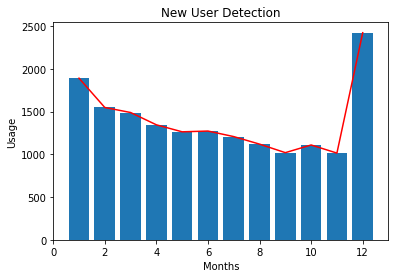

In [9]:
print (x)
print (y)
plt.bar(x, y)
plt.plot(x,y,color='red')
plt.xlabel('Months')
plt.ylabel('Usage')
plt.title('New User Detection')
plt.show()

### Some insights we can draw from the graph:
- The number of new users generally keep decreasing as the year progresses
- Highest number of new users were in December-2017 i.e. 1892
- Lowest number of new users were in November-2018 i.e. 1015
- There is a slight increase in number of users in the months of June and October

# Question-2 Thirty day repeat rate of users in December-2017

### Step-1 Importing Libraries
Datetime library in python is used for dealing with dates 

In [10]:
import datetime 


### Step-2
We declare a set. This serves the following purpose:

Set (unique_users_dec): This set is maintained to store unique users of december in the given dataset

In [11]:
unique_users_dec=set()

Here we add unique users in december dictionary (unique_users_dict)

In [12]:
for index,row in dataset.iterrows():
    if row['Date_of_Booking'][5:7]=='12':
        unique_users_dec.add(int(row['Profile ID']))

### Step-3 
Here we intialise our dictionary of profile ids with empty lists. Dictionary Parts are:
- Keys: Unique users from the set unique_users_dec
- Values: Lists of Date of Bookings of that Profile ID

In [13]:
dict_id_dob={}
for i in unique_users_dec:
    dict_id_dob[i]= []

### Step-4
As soon as we find profile id from the set, we append the date of booking to the list of date of bookings kept at that key

In [14]:
for index, row in dataset.iterrows():
    if row['Profile ID'] in unique_users_dec:
        dict_id_dob[row['Profile ID']].append(row['Date_of_Booking'])

### Step-5
As soon as we have the list of date of bookings, we take all those dates from the list, which have length greater than unity, since length lesser than unity, would imply one boooking in the entire year, so there is no chance of a 30 day repeat! Then we take difference between first two dates and check for greater or lesser than 30, and accordingly update the count variable. And finally the percentage is evaluated.

In [15]:
count=0.0
for x,y in dict_id_dob.items():
    if(len(y)>1):
        diff=datetime.datetime.strptime(y[1], '%Y-%m-%d').date()- datetime.datetime.strptime(y[0], '%Y-%m-%d').date()
        if(diff.days<=30):
            count=count+1

In [16]:
percentage= (count*100)/len(unique_users_dec)

In [17]:
print("Percentage of users having a 30 day repeat in December is: ", percentage, "%")

Percentage of users having a 30 day repeat in December is:  16.831683168316832 %


#### Here we come to see that, the percentage of users having a 30 day repeat in December is 16.83% ~ 17.00%

# Question-3 Nintey day repeat rate of users in January, February, March-2018

This question has a similar approach to Question-2

### Step-2
We declare a set. This serves the following purpose:

- Set (unique_users_jan): This set is maintained to store unique users of January in the given dataset
- Set (unique_users_feb): This set is maintained to store unique users of February in the given dataset
- Set (unique_users_mar): This set is maintained to store unique users of March in the given dataset


In [18]:
unique_users_jan=set()
unique_users_feb=set()
unique_users_mar=set()

Here we add unique users in 
- january dictionary (unique_users_jan)
- february dictionary (unique_users_feb)
- march dictionary (unique_users_mar)

In [19]:
for index,row in dataset.iterrows():
    if row['Date_of_Booking'][5:7]=='01':
        unique_users_jan.add(int(row['Profile ID']))
    elif row['Date_of_Booking'][5:7]=='02':
        unique_users_feb.add(int(row['Profile ID']))
    elif row['Date_of_Booking'][5:7]=='03':
        unique_users_mar.add(int(row['Profile ID']))

### Step-3 
Here we intialise our dictionaries of profile ids with empty lists. Dictionary Parts are:
- Keys: Unique users from the set: 
    - unique_users_jan
    - unique_users_feb
    - unique_users_mar
- Values: Lists of Date of Bookings of that Profile ID

In [20]:
dict_id_dob_jan={}
dict_id_dob_feb={}
dict_id_dob_mar={}

In [21]:
for i in unique_users_jan:
    dict_id_dob_jan[i]= []

In [22]:
for i in unique_users_feb:
    dict_id_dob_feb[i]= []

In [23]:
for i in unique_users_mar:
    dict_id_dob_mar[i]= []

### Step-4
As soon as we find profile id from the set, we append the date of booking to the list of date of bookings kept at that key of the required month

In [24]:
for index, row in dataset.iterrows():
    if row['Profile ID'] in unique_users_jan:
        dict_id_dob_jan[row['Profile ID']].append(row['Date_of_Booking'])
    elif row['Profile ID'] in unique_users_feb:
        dict_id_dob_feb[row['Profile ID']].append(row['Date_of_Booking'])
    elif row['Profile ID'] in unique_users_mar:
        dict_id_dob_mar[row['Profile ID']].append(row['Date_of_Booking'])

### Step-5
As soon as we have the list of date of bookings, we take all those dates from the list, which have length greater than unity, since length lesser than unity, would imply one boooking in the entire year, so there is no chance of a 30 day repeat! Then we take difference between first two dates and check for greater or lesser than 30, and accordingly update the count variable. And finally the percentage is evaluated.

In [25]:
count_jan=0.0
count_feb=0.0
count_mar=0.0

#### January Calculation:

In [26]:
for x,y in dict_id_dob_jan.items():
    if(len(y)>1):
        diff=datetime.datetime.strptime(y[1], '%Y-%m-%d').date()- datetime.datetime.strptime(y[0], '%Y-%m-%d').date()
        if(diff.days<=90):
            count_jan=count_jan+1


In [27]:
percentage_jan=(count_jan*100)/len(unique_users_jan)

In [28]:
print("Percentage of users having a 90 day repeat rate in January is: ", percentage_jan, "%")

Percentage of users having a 90 day repeat rate in January is:  38.20998278829604 %


#### February Calculation:

In [29]:
for x,y in dict_id_dob_feb.items():
    if(len(y)>1):
        diff=datetime.datetime.strptime(y[1], '%Y-%m-%d').date()- datetime.datetime.strptime(y[0], '%Y-%m-%d').date()
        if(diff.days<=90):
            count_feb=count_feb+1

In [30]:
percentage_feb=(count_feb*100)/len(unique_users_jan)

In [31]:
print("Percentage of users having a 90 day repeat rate in February is: ", percentage_feb, "%")

Percentage of users having a 90 day repeat rate in February is:  21.428571428571427 %


#### March Calculation:

In [32]:
for x,y in dict_id_dob_mar.items():
    if(len(y)>1):
        diff=datetime.datetime.strptime(y[1], '%Y-%m-%d').date()- datetime.datetime.strptime(y[0], '%Y-%m-%d').date()
        if(diff.days<=90):
            count_mar=count_mar+1

In [33]:
percentage_mar=(count_mar*100)/len(unique_users_mar)

In [34]:
print("Percentage of users having a 90 day repeat rate in March is: ", percentage_mar, "%")

Percentage of users having a 90 day repeat rate in March is:  15.969750889679716 %


#### Hence the 90 day repeat rate of January, February and March are 38.20%, 21.42% and 15.96% ~ 38%, 21% and 16% respectively

# Question- 4 & 5 Prediction of Nintey Day Repeat in November using Logistic Regression and plotting frequency of users according to their 90 day repeat

### Step-1 Importing the libraries
We import the sklearn library which is a standard library in python, and it contains a lot of classes and methods which assist in machine learning activities and tasks. Here we use two classes from sklearn library:
- train_test_split: This class is used to split the dataset into train and test sets, in which our model is trained on training set, and tested on test set.
- LogisticRegression: It is class which provides us with the functionalities to apply logistic regression on our dataset. Logistic Regression is a classification algorithm, that classfies according to the given set of features into a probability range between [0,1]. Depending upon our confidence range value, generally it is 0.5, we can say that particular class belongs to a particular class i.e. above or below of our confidence value. 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Step-2
We create a unique users set, containing unique users across the entire dataset

In [36]:
# Unique Users Set
unique_users= set()

In [37]:
# Filling this set
for index, row in dataset.iterrows():
    unique_users.add(row['Profile ID'])

### Step-3 
We create a dictionary of unique users which has unique_users and their list of bookings. It includes:
- Keys: All the unique Profile IDS across the dataset
- Values: List of all the date of bookings, of that Profile ID

In [38]:
# Dictionary of unique users and their date of bookings
dict_id_dob= {}

In [39]:
# Preparation of Profile IDS and list of bookings list
for i in unique_users:
    dict_id_dob[i]= []

Now we append all the date of bookings to the date of booking list in the dictionary across each Profile ID

In [40]:
# Adding date of bookings to the dictionary with Profile IDs from the given set
for index, row in dataset.iterrows():
    if row['Profile ID'] in unique_users:
        dict_id_dob[row['Profile ID']].append(row['Date_of_Booking'])

### Step-4 
Now we create two dictionaries:
- dict_freq_ids: This dictionary is used for creating a map between Profile IDS and their frequency.
- dict_freq_count: This dictionary is used for creating a map between number of times 90 day repeat occurs and its corresponding number 

In [41]:
# Dictionaries of frequency of profile IDS and their count
dict_freq_ids={}
dict_freq_count={}

In [42]:
# Filling the dictionay-1
for i in range(60):
    dict_freq_count[i]=0
    


In [43]:
# Filling the dictionary-2
for i in range(100):
    dict_freq_ids[i]= set()

#### This is a simple function to calculate the difference in days between two days 

In [44]:
# Day Difference
def calculate_day_diff(d1, d2):
    diff=datetime.datetime.strptime(d1, '%Y-%m-%d').date()- datetime.datetime.strptime(d2, '%Y-%m-%d').date()
    return diff.days

#### This Y is a numpy list which has labels 0/1 corresponding to each Profile ID who has ever or never done a 90 Day Repeat
- 0: If the user has never done a 90 day repeat 
- 1: If the user has ever done a 90 day repeat 

In [45]:
# This Y will go for train_test_split
Y= np.zeros((len(unique_users),))

### Step-5
Now all the dictionaries and numpy lists are filled

In [46]:
# Preparing the dictionaries
for p_id in dict_id_dob:
    
    if len(dict_id_dob[p_id])>1:
        count=0
        label=0
        for i in range(len(dict_id_dob[p_id])-1):
            if calculate_day_diff(dict_id_dob[p_id][i+1], dict_id_dob[p_id][i])<=90:
                label=1
                count= count+1
                
        Y[p_id]= label
        dict_freq_ids[count].add(p_id)
        dict_freq_count[count]= len(dict_freq_ids[count])

In [47]:
print((dict_freq_count))

{0: 1423, 1: 1569, 2: 558, 3: 305, 4: 181, 5: 142, 6: 104, 7: 62, 8: 53, 9: 44, 10: 42, 11: 43, 12: 24, 13: 20, 14: 15, 15: 19, 16: 7, 17: 10, 18: 5, 19: 10, 20: 7, 21: 4, 22: 3, 23: 7, 24: 4, 25: 7, 26: 3, 27: 3, 28: 4, 29: 1, 30: 0, 31: 2, 32: 1, 33: 1, 34: 0, 35: 1, 36: 0, 37: 0, 38: 1, 39: 0, 40: 1, 41: 0, 42: 0, 43: 0, 44: 0, 45: 2, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 1, 56: 0, 57: 0, 58: 0, 59: 0}


In [48]:
print(dict_freq_ids)

{0: {1, 3, 16393, 8202, 8208, 18, 8216, 16413, 32, 33, 34, 16420, 38, 39, 8232, 50, 58, 16447, 64, 8258, 16453, 72, 76, 16460, 16462, 16464, 8275, 16468, 16470, 87, 8279, 90, 16479, 8290, 100, 16486, 8295, 8296, 8297, 8309, 8312, 16506, 8318, 8319, 135, 16522, 140, 145, 16535, 8347, 8351, 163, 16553, 16556, 173, 8367, 8369, 179, 8378, 8379, 16575, 194, 8391, 206, 8399, 210, 218, 8414, 223, 16610, 16611, 16621, 242, 256, 8448, 8454, 265, 266, 267, 16651, 16663, 283, 8480, 290, 16674, 16676, 295, 16683, 309, 16707, 8521, 8524, 344, 8554, 8569, 397, 404, 8597, 412, 419, 422, 430, 442, 462, 8659, 8667, 8671, 481, 489, 8684, 8686, 506, 8706, 539, 556, 557, 563, 576, 580, 8779, 588, 592, 595, 8796, 606, 609, 611, 616, 628, 629, 8828, 8830, 639, 8839, 8845, 8852, 666, 8861, 687, 8880, 691, 8890, 8899, 713, 715, 719, 727, 8924, 8928, 737, 8931, 756, 781, 786, 8985, 799, 8993, 815, 825, 9024, 838, 840, 9035, 853, 859, 9056, 9059, 9061, 9063, 873, 888, 890, 899, 9091, 9092, 9099, 908, 9117, 9126

### Step-6 Plotting of Graph

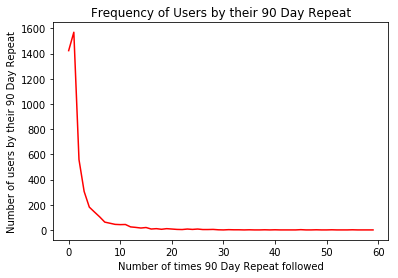

In [50]:

plt.plot(list(dict_freq_count.keys()), list(dict_freq_count.values()),color='red')
plt.title('Frequency of Users by their 90 Day Repeat')
plt.xlabel('Number of times 90 Day Repeat followed')
plt.ylabel('Number of users by their 90 Day Repeat')
plt.show()

### Step- 7 
We make a copy of our dataset

In [51]:
# Copy dataset
copy_dataset= dataset

### Step-8
Since in the question, it was asked to take Gap between the date of booking and date of service requested, we create a column in our dataset which is a list of difference in dates of booking and service requested.

In [52]:
# Gap b/w dates of booking and service requested
gap_booking_service_date=[]

Creation of list

In [53]:
# Preparing gap of servive list
for i in range(len(copy_dataset)):
    #print(copy_dataset.at[i,'Date_of_Service_Requested'],": :",copy_dataset.at[i,'Date_of_Booking'])
    gap_booking_service_date.append(calculate_day_diff(copy_dataset.at[i,'Date_of_Service_Requested'],copy_dataset.at[i,'Date_of_Booking']))

Addition of the column Difference days in the dataset

In [54]:
copy_dataset['Difference_Days']= gap_booking_service_date

### Step-9 
We do inclusion of appropriate and reliable features for our model, which are:
- Source of Booking
- Difference_days
- Slot of Booking (Hour of the Day)

In [55]:
copy_dataset = copy_dataset[['Source','Difference_Days','Slot of Booking (Hour of the Day)']]

### Step-10 Labelling categorical data
We need to address categorical data in our dataset, to get our model worked upon. For example here in our dataset, we have A,B,C, etc. as values of Slot of Booking (Hour of the day), so our classifier cannot directly operate on sich data. We need to encode it into numeric form. For this we use LabelEncoder class of sklearn library, which does the task for us.

In [56]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

We create an object for the LabelEncoder class, and apply label encoding with the help of apply() function, using the fit_transform

In [57]:
ds= copy_dataset.apply(le.fit_transform)

### Step-11 
We need to convert our data into a numpy array, before processing

In [58]:
small_data_set= np.asarray(ds)

### Step-12 Creation of labels 0 or 1 for classification

We declare a numpy list of dimensions of dataset, which basically has values of 0 in it intially. Now as we find users, which have done 90 day repeat, we go there, and update the value of that ID, regardless of number of times the user did it. If the user has done a 90 day repeat once, 1 labelling is given.

In [59]:
Y_train=np.zeros((len(copy_dataset),))

In [60]:
for i in range(len(Y)):
    if(Y[i]==1):
        Y_train[i]=1

### Step-13 Demaraction of train and test sizes
We take all the months from Dec-2017 and Oct-2018 as training data, and keep Nov-2018 as testing data

In [61]:
train_size=0
for index,row in dataset.iterrows():
    if int(row['Date_of_Booking'][5:7])<11:
        train_size=train_size+1

In [62]:
test_size= 1-(train_size/len(dataset))

### Step-14 Splitting data into train and test sets
We split the data into train and test sets, using the test_size calculation above

In [63]:
x_train, x_test, y_train, y_test= train_test_split(small_data_set, Y_train, test_size = 0.17252747252747258, random_state = 0)

### Step-15 Training our classifier
Now we train our classifier over the training set, which learns the right set of parameters, to classify the users. We create an object of LogisticRegression class, and fit the classifier to our dataset, using the fit() method

In [64]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

D:\ProgrammingRelated\AnacondaNavigator\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Step-16 Predictions on Test Set

In [65]:
y_pred=classifier.predict(x_test)

### Step-17 Accuracy of the model

In [68]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)

In [69]:
print("Accuracy of the Logistic Regression Model is: ",100*acc," %")

Accuracy of the Logistic Regression Model is:  89.71717550103016  %
